In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
plt.style.use('fivethirtyeight')

## WHAT IS DERVATIVE

In [2]:
def f(x):
    return 3*x**2 - 4*x + 10

In [3]:
def plot_func(xs, ys, title="Example"):
    fig, ax = plt.subplots(1,1,figsize=(16,9))
    ax.plot(xs, ys)
    ax.set_title(title)
    plt.show()

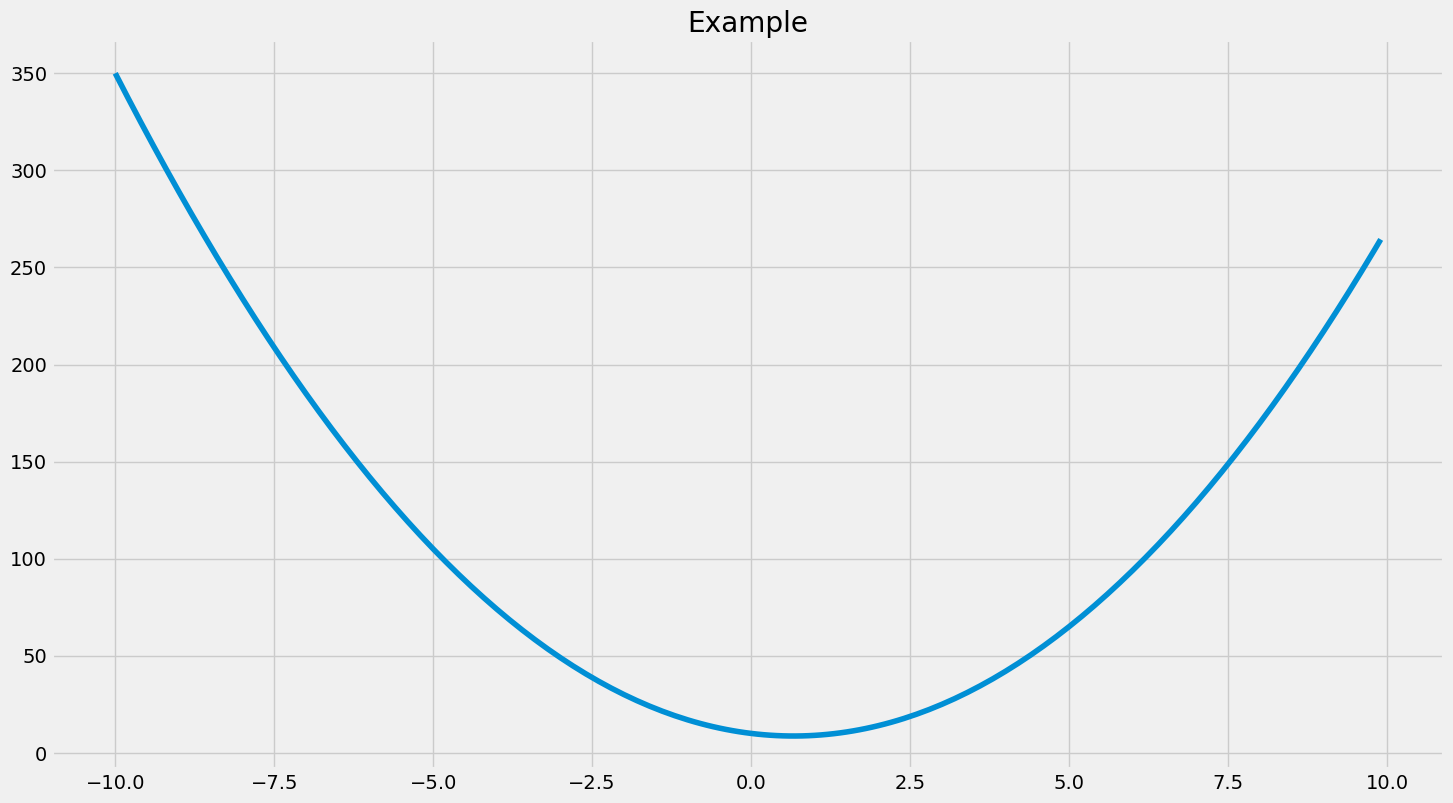

In [4]:
xs = np.arange(-10,10,0.1)
ys = f(xs)
plot_func(xs, ys)

$$ L = \lim_{h\to0} \frac{df}{dx} = \frac{ f(x+h) - f(x)}{h}$$

In [5]:
h = 0.00000000001
x1, x2, x3 = -3, 2/3, 3
print(f"df({x1:2}) = {(f(x1+h) - f(x1))/h}")
print(f"df({x2:2}) = {(f(x2+h) - f(x2))/h}")
print(f"df({x3:2}) = {(f(x3+h) - f(x3))/h}")

df(-3) = -21.999824184604222
df(0.6666666666666666) = 0.0
df( 3) = 14.000178794049134


##### Multi Variable

In [6]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


* What is the influence of pumping **a** by **** to the value of **d** 

In [7]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a  += h
d2 = a*b + c

print(f'd1     : {d1}')
print(f'd2     : {d2}')
print(f'slope  : {(d2-d1)/h}')

d1     : 4.0
d2     : 3.999699999999999
slope  : -3.000000000010772


* What is the influence of pumping **b** by **** to the value of **d** 

In [8]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b  += h
d2 = a*b + c

print(f'd1     : {d1}')
print(f'd2     : {d2}')
print(f'slope  : {(d2-d1)/h}')

d1     : 4.0
d2     : 4.0002
slope  : 2.0000000000042206


* What is the influence of pumping **c** by **** to the value of **d** 

In [9]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c  += h
d2 = a*b + c

print(f'd1     : {d1}')
print(f'd2     : {d2}')
print(f'slope  : {(d2-d1)/h}')

d1     : 4.0
d2     : 4.0001
slope  : 0.9999999999976694


***

* Function for vizualize computation tree

In [46]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    counter=1
    for n in nodes:
        if n.label=='':
            node_label=f'y{counter}'
            counter+=1
        else:
            node_label=n.label
            
        dot.node(name=str(id(n)), label = "{ %s| data:%.4f | grad:%.4f }" % (node_label,n.data,n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [47]:
class Value:
    def __init__(self, data, _chidlern=(), _op='', label=''):
        self.data = data
        self.grad = 0.0             # grade=0 means no effect
        self._prev= set(_chidlern)
        self._op  = _op
        self.label= label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, right):
        return Value(self.data + right.data, (self, right), self._op)
    
    def __mul__(self, right):
        return Value(self.data * right.data, (self, right), self._op)
    
    

In [48]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
# e = a*b   ; e.label = 'e'
d = a*b + c ; d.label = 'd'

print(f'd      : {d}')
print(f'd_prev : {d._prev}')
print(f'd_op   : {d._op}')

d      : Value(data=4.0)
d_prev : {Value(data=-6.0), Value(data=10.0)}
d_op   : 


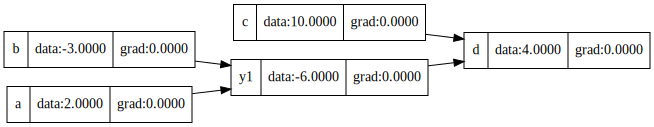

In [49]:
draw_dot(d)

In [62]:
def test_grad():
    '''
    Test Gradient manually if you want to get gradient 
    of L with respect to any varaible in the computation
    statment just add h to that variable.
    '''
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b   ; e.label = 'e'
    d = e + c ; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label='l'
    L1= L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0+h, label='b')
    c = Value(10.0, label='c')
    e = a*b  ; e.label = 'e'
    d = e + c ; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label='l'
    L2= L.data
    
    print(f"{(L2-L1)/h}")

test_grad()
    

-4.000000000026205
